In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import pymc3 as pm
import arviz as az
import theano as thno
#import theano.tensor as T

import os
import sklearn
import sys
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import random
random.seed(88)




import xarray as xr
from theano import tensor as tt

print(f"Running on PyMC3 v{pm.__version__}")
warnings.simplefilter(action="ignore", category=FutureWarning)
RANDOM_SEED = 8924
np.random.seed(286)

Running on PyMC3 v3.9.3


In [2]:
import dask.dataframe as dd
import statsmodels.api as sm
from linearmodels import PanelOLS

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.kde import KernelDensity
import statsmodels.formula.api as smf
import patsy as pt

In [4]:
az.style.use("arviz-darkgrid")
%matplotlib inline
sns.set(style="darkgrid", palette="muted")
# plt.style.use('default')
plt.rcParams['figure.figsize'] = 12, 6

In [5]:
import scipy.stats
from IPython.display import HTML
from scipy.stats import norm
#display(HTML('''<style>[data-mime-type="application/vnd.jupyter.stdout"] 
#pre { font-size:25px}</style>''')) 

In [6]:
from glob import glob
import re
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
import requests
import time
import random
import json

In [7]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [8]:
%config InlineBackend.figure_format = 'retina'
warnings.simplefilter(action="ignore", category=(FutureWarning, UserWarning))
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

In [9]:
def standardize(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()

In [10]:
WOB_ENTERPRISE_SURVEY = pd.read_stata('D:/WORLDBANK ENTERPRISE SURVEY/assets \
Standardized New 2006-2019/New_Comprehensive_October_15_2020.dta')

In [11]:
COUNTRY_GEO_LOCATION = pd.read_excel('D:/DATASETS/GEO_DIST/geo_cepii.xls',  encoding='latin1')
#COUNTRY_GEO_LOCATION.head()
ISO_ALPHA = pd.read_excel("D:/DATASETS/continents22.xls",encoding='latin1')
COUNTRY_WBES_DETAILS = pd.read_excel('D:/WORLDBANK ENTERPRISE SURVEY/DataDetails.xls', 
                                     encoding='latin1')
#COUNTRY_WBES_DETAILS
COUNTRY_WBES_DETAILS2 = pd.read_excel('D:/WORLDBANK ENTERPRISE SURVEY/DataDetails.xls', \
                                      sheet_name='Sheet2', encoding='latin1')
#COUNTRY_WBES_DETAILS2
COUNTRY_WBES_DETAILS3 = pd.read_excel('D:/WORLDBANK ENTERPRISE SURVEY/DataDetails.xls',
                                      header=0,sheet_name='BEST', 
                                     encoding='latin1') #dtype='object'

In [12]:
world_bank_gdp = pd.read_excel('D:/WORLDBANK ENTERPRISE SURVEY/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_1865023.xls',header=3, sheet_name=0)
world_bank_iso3 = pd.read_excel('D:/WORLDBANK ENTERPRISE SURVEY/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_1865023.xls',usecols=[0,1,2,4],sheet_name=1)
Patent_application = pd.read_csv('D:/DATASETS/WORLD/PATENT INNOVATION/Total patent applications 2000 2019.csv',header=7)
FDI_37 = pd.read_excel('D:/DATASETS/WORLD/Data_Extract_From_World_Development_Indicators(1).xlsx',
                       header=0,sheet_name='Data',nrows=419,na_values='..')#sep='\s\s+',
FDI_ALL1 = pd.read_excel('D:/DATASETS/WORLD/FDI/FDI EXTRACTED FROM WBDI.xlsx',
                       header=0,sheet_name='Data',nrows=1583,na_values='..')#sep='\s\s+',
ENTREPRENEURSHIP_PATENT = pd.read_excel('D:/DATASETS/WORLD/PATENT INNOVATION/ENTREPRENEURSHIP AND PATENT.xlsx',
                                        header=0,sheet_name='Data',nrows=794,na_values='..')

In [13]:
WOB_ENTERPRISE_SURVEY["size"].value_counts(dropna=False)
WOB_ENTERPRISE_SURVEY["size1"] = WOB_ENTERPRISE_SURVEY["size"].astype("category").cat.rename_categories(
    {'Small(<20)': 'Small', 'Medium(20-99)': 'Medium','Large(100 And Over)':'Large'})
WOB_ENTERPRISE_SURVEY["size1"].value_counts(dropna=False)

Small     78875
Medium    56618
Large     32564
Name: size1, dtype: int64

In [14]:
#SPLIT THE YEAR AND CREATE A NEW COLUMN
WOB_ENTERPRISE_SURVEY.country.astype('string')
# METHOD 1
WOB_ENTERPRISE_SURVEY['Year2'] = WOB_ENTERPRISE_SURVEY.country.str.findall(
    r"([0-9]+)").apply(' '.join)
#METHOD 2
WOB_ENTERPRISE_SURVEY['Year2'] = WOB_ENTERPRISE_SURVEY.country.str.findall(
    r"\d+").apply(' '.join)
# SPLIT THE NAME AND CREATE A NEW COLUMN
WOB_ENTERPRISE_SURVEY.country.astype('string')
WOB_ENTERPRISE_SURVEY['Country_Name'] = WOB_ENTERPRISE_SURVEY.country.str.findall(
    r"\D+").apply(' '.join)

In [15]:
WOB_ENTERPRISE_SURVEY['INNOV'] = np.where((WOB_ENTERPRISE_SURVEY['h1']=="Yes") | 
                         (WOB_ENTERPRISE_SURVEY['h5']=="Yes"), "Yes", "No")
WOB_ENTERPRISE_SURVEY['INNOV'] = np.where((WOB_ENTERPRISE_SURVEY['h1'].isnull()) | 
                         (WOB_ENTERPRISE_SURVEY['h5'].isnull()), np.nan, WOB_ENTERPRISE_SURVEY['INNOV'])
col_list=['h1','h5','INNOV']#'n2b','n2i','country','sector_MS',
WOB_ENTERPRISE_SURVEY[WOB_ENTERPRISE_SURVEY.columns[WOB_ENTERPRISE_SURVEY.columns.isin(col_list)]].head(5)
#WOB_ENTERPRISE_SURVEY2["Mark_Up"] = ((WOB_ENTERPRISE_SURVEY2["d2"] - 
#                                    WOB_ENTERPRISE_SURVEY2["n2a"])/WOB_ENTERPRISE_SURVEY2["d2"])

,h1,h5,INNOV
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [16]:
#AGE
WOB_ENTERPRISE_SURVEY[(WOB_ENTERPRISE_SURVEY["h1"].isna())]
print(WOB_ENTERPRISE_SURVEY.shape)
WOB_ENTERPRISE_SURVEY = WOB_ENTERPRISE_SURVEY[~(WOB_ENTERPRISE_SURVEY["b5"]=="Don't Know (Spontaneous)")]
print(WOB_ENTERPRISE_SURVEY.shape)
WOB_ENTERPRISE_SURVEY = WOB_ENTERPRISE_SURVEY[(pd.notnull(WOB_ENTERPRISE_SURVEY.b5))]
print(WOB_ENTERPRISE_SURVEY.shape)
WOB_ENTERPRISE_SURVEY["b5"] = WOB_ENTERPRISE_SURVEY.b5.astype("int64")

(168057, 359)
(165718, 359)
(165675, 359)


In [17]:
WOB_ENTERPRISE_SURVEY[~(WOB_ENTERPRISE_SURVEY["b5"]=="Don't Know (Spontaneous)")]
WOB_ENTERPRISE_SURVEY['INNOV'].value_counts(dropna=False)

No     59800
Yes    54375
NaN    51500
Name: INNOV, dtype: int64

In [18]:
WOB_ENTERPRISE_SURVEY = WOB_ENTERPRISE_SURVEY[
    pd.to_numeric(WOB_ENTERPRISE_SURVEY["b2b"],errors="coerce").notnull()]
WOB_ENTERPRISE_SURVEY = WOB_ENTERPRISE_SURVEY[~(WOB_ENTERPRISE_SURVEY["b2b"]<0)]
WOB_ENTERPRISE_SURVEY["b2b"] = WOB_ENTERPRISE_SURVEY.b2b.astype(float)

#WOB_ENTERPRISE_SURVEY["MANAGEREXP"] = WOB_ENTERPRISE_SURVEY["b7"]>=.10

WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"] = WOB_ENTERPRISE_SURVEY["b2b"]/100
WOB_ENTERPRISE_SURVEY["MNES"] = WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"]>=.10
WOB_ENTERPRISE_SURVEY["MNES50"] = WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"]>=.50
WOB_ENTERPRISE_SURVEY["MNES_FULL"] = WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"]==.100
WOB_ENTERPRISE_SURVEY["MNES_PARTIAL"] = ((WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"]>=.10)&
                                 (WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"] < .100))
WOB_ENTERPRISE_SURVEY['MNES_AGG'] = WOB_ENTERPRISE_SURVEY.groupby(
    ['Country_Name','Year2'])['MNES'].transform('sum')


WOB_ENTERPRISE_SURVEY["DOMESTIC"] = WOB_ENTERPRISE_SURVEY["FOREIGNSHARE"]<.10
WOB_ENTERPRISE_SURVEY["DOMESTIC"] = WOB_ENTERPRISE_SURVEY.DOMESTIC.astype("category")
WOB_ENTERPRISE_SURVEY["DOMESTIC"] = WOB_ENTERPRISE_SURVEY.DOMESTIC.cat.codes
WOB_ENTERPRISE_SURVEY["AGE"] = WOB_ENTERPRISE_SURVEY[
    "Year2"].astype("int64") - WOB_ENTERPRISE_SURVEY["b5"]


WOB_ENTERPRISE_SURVEY.MNES = pd.Categorical(WOB_ENTERPRISE_SURVEY.MNES)
WOB_ENTERPRISE_SURVEY["MNES"] = WOB_ENTERPRISE_SURVEY.MNES.cat.codes
#WOB_ENTERPRISE_SURVEY["MNES_FULL"] = WOB_ENTERPRISE_SURVEY.MNES_FULL.cat.codes
#WOB_ENTERPRISE_SURVEY["MNES_PARTIAL"] = WOB_ENTERPRISE_SURVEY.MNES_PARTIAL.cat.codes

WOB_ENTERPRISE_SURVEY.INNOV = pd.Categorical(WOB_ENTERPRISE_SURVEY.INNOV)
#WOB_ENTERPRISE_SURVEY["INNOV"] = WOB_ENTERPRISE_SURVEY.INNOV.cat.codes
High_Techno = [22,23,24,30,32,33]#22,23,24,33
Medium_Techno = [25,29,31,34]#25,29,31,34
Low_Techno = [15,16,17,18,19,20,21,26,27,28,36,37,52,51,45,50,55,60,72]#15,16,17,18,19,20,21,26,27,28,36,37,52,51,45,50,55,60,72
col         = 'isic'
conditions  = [ (WOB_ENTERPRISE_SURVEY[col].isin(High_Techno)), 
               (WOB_ENTERPRISE_SURVEY[col].isin(Medium_Techno)),
               (WOB_ENTERPRISE_SURVEY[col].isin(Low_Techno))]
choices     = [ "high", 'medium', 'low' ]
    
WOB_ENTERPRISE_SURVEY["TECHNO"] = np.select(conditions, choices, default=np.nan)

#10, 11, 12, 13, 14, 35, 40, 41, 53, 57, 61, 62, 63, 64, 65, 66, 67, 70, 71, 73, 74, 75, 81, 84, 85, 90, 92, 93, 95, 98, 513
#WOB_ENTERPRISE_SURVEY["age"] = (WOB_ENTERPRISE_SURVEY["Year2"] - 
#                                WOB_ENTERPRISE_SURVEY["b5"])

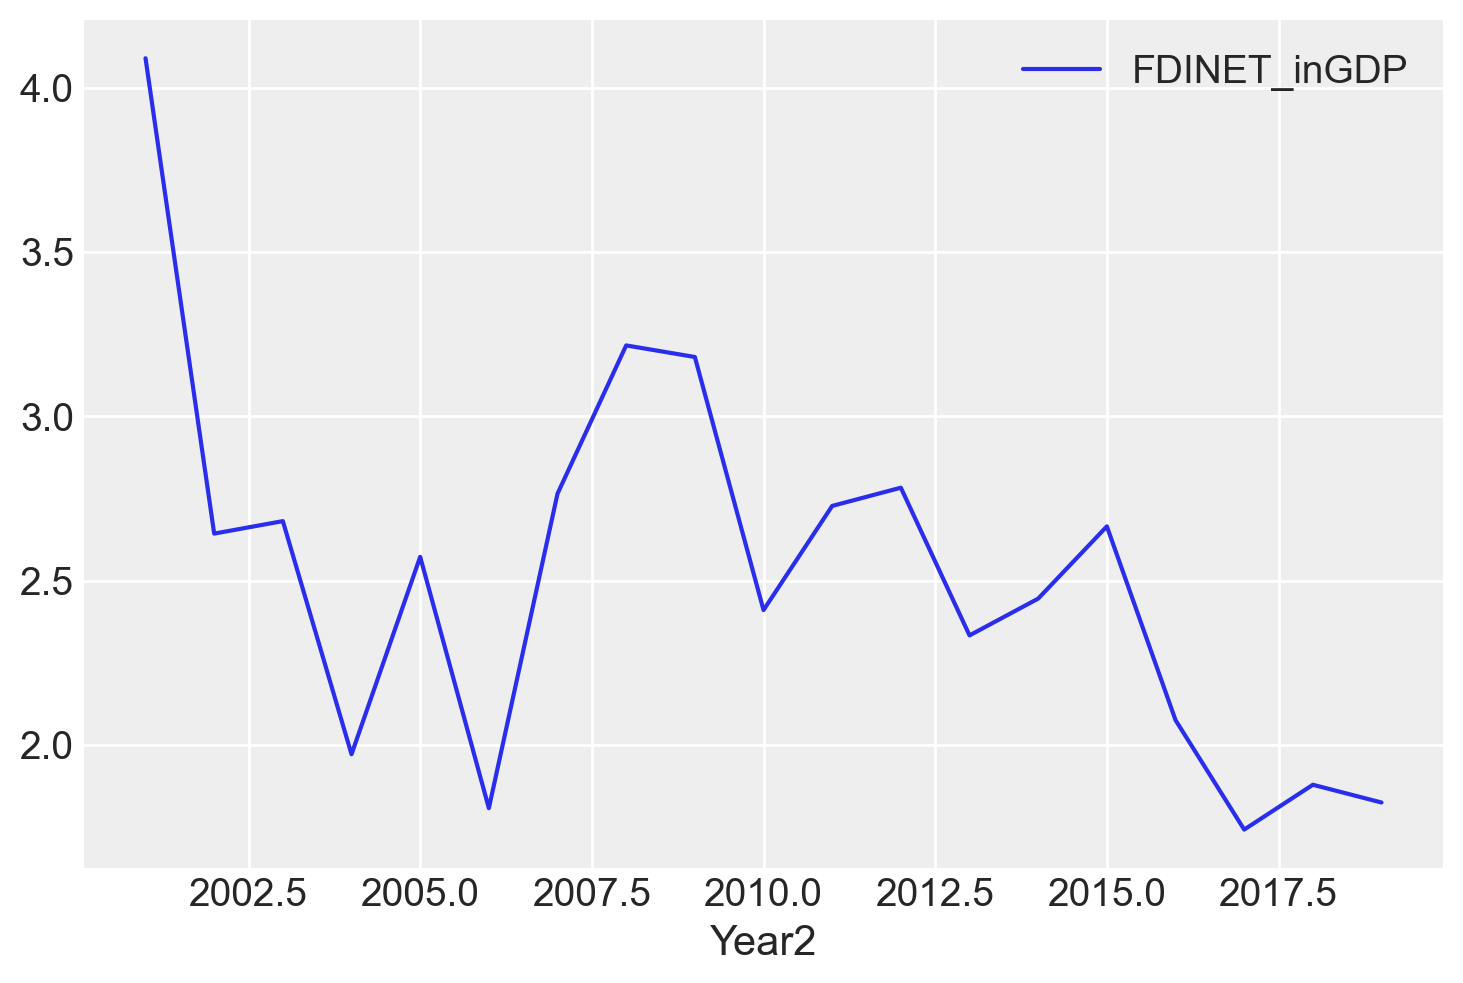

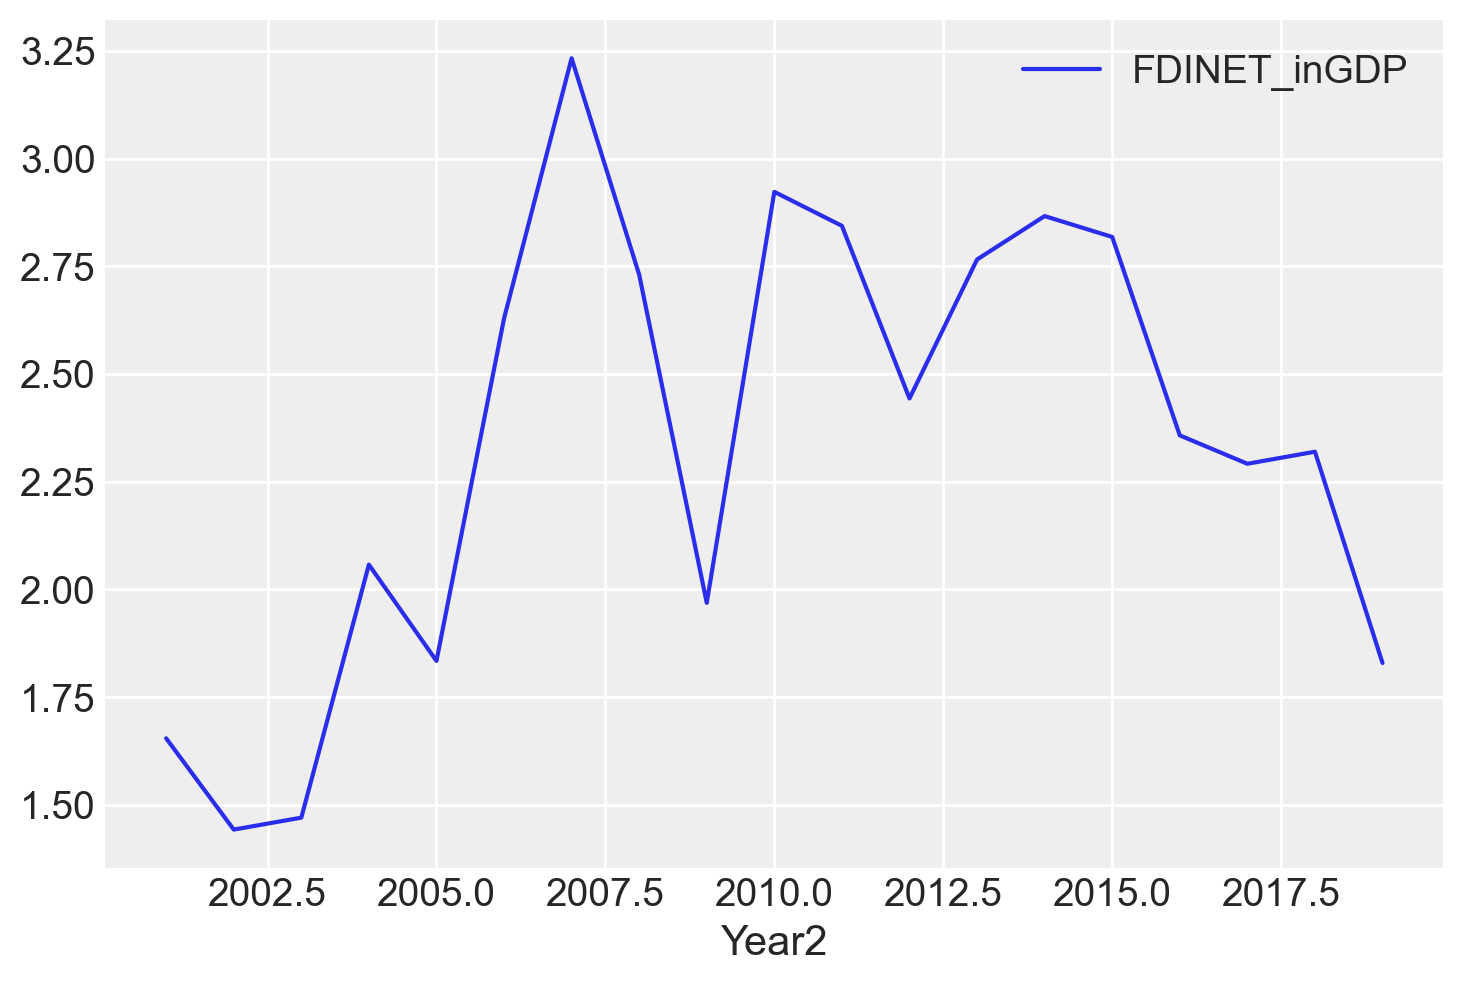

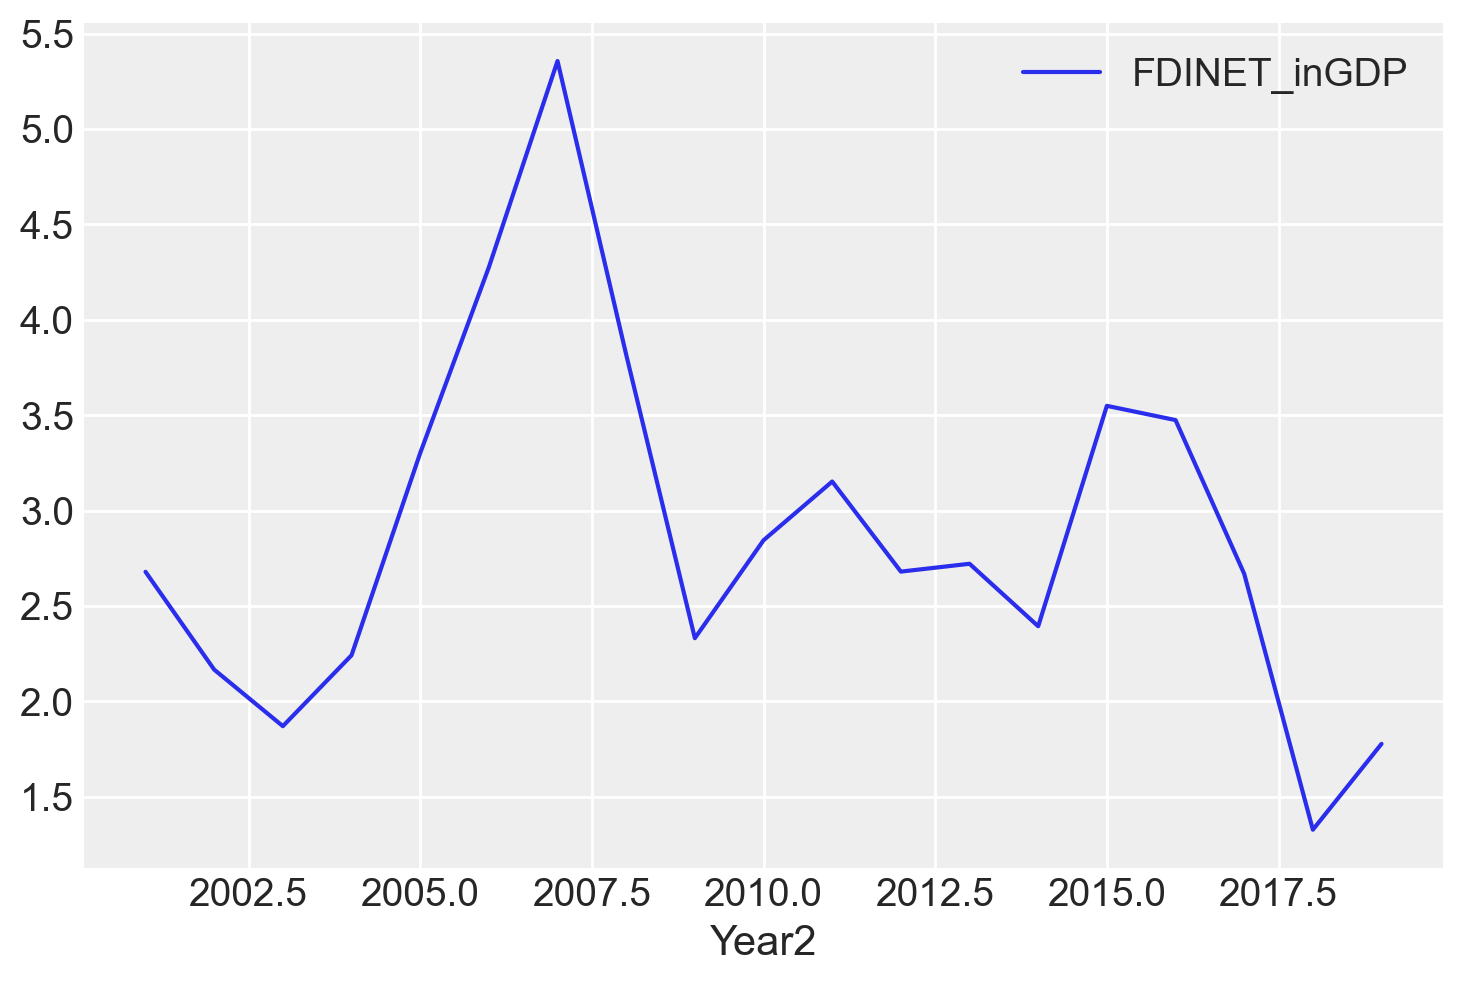

In [19]:
WOB_ENTERPRISE_SURVEY.Year2.apply(int)
WOB_ENTERPRISE_SURVEY['Year2']=WOB_ENTERPRISE_SURVEY.Year2.astype('int64')
ISO3_DICT = COUNTRY_WBES_DETAILS3.groupby(
    ['Country_Name','Year2'])['iso3'].unique().rename('iso_Alpha')
WOB_ENTERPRISE_SURVEY2 = WOB_ENTERPRISE_SURVEY.join(ISO3_DICT, on=['Country_Name','Year2'])
WOB_ENTERPRISE_SURVEY2['iso3'] = WOB_ENTERPRISE_SURVEY2.iso_Alpha.str[0]
WOB_ENTERPRISE_SURVEY2

world_bank_gdp1 = world_bank_gdp.drop(columns=["Indicator Name","Indicator Code"])
WORLD_GDP = world_bank_gdp1.set_index(['Country Name','Country Code']).stack().rename_axis(['Country_Name','iso3','Year2']).rename('GDP').reset_index()
WORLD_GDP
WORLD_GDP['Year2']=WORLD_GDP.Year2.astype('int64')
GDP_FULL = WORLD_GDP.groupby(
    ['iso3','Year2'])['GDP'].unique().rename('GDP')
WOB_ENTERPRISE_SURVEY3 = WOB_ENTERPRISE_SURVEY2.join(GDP_FULL, on=['iso3','Year2'])
WOB_ENTERPRISE_SURVEY3['GDP2'] = WOB_ENTERPRISE_SURVEY3.GDP.str[0]
WOB_ENTERPRISE_SURVEY3

FDI_ALL = FDI_ALL1.drop(columns=['Series Code'])
FDI_ALL.rename(columns={'Country Name':'Country_Name','Country Code':'iso3',
                       'Series Name':'Series'}, inplace=True)
FDI_ALL = FDI_ALL.set_index(drop=True, keys=['Country_Name','iso3','Series']).rename_axis(
    'Year2', axis=1).stack().unstack(level=-2).reset_index()
namesList = ['FDI_BOP_NET','FDINET_inGDP','FDI_BOP_netIN','FDINET_outGDP','FDI_BOP_netOUT',
             'NET_FOREIGN_AS']
FDI_ALL.columns = FDI_ALL.columns[:3].tolist() + namesList
FDI_ALL['Year2'] = FDI_ALL.Year2.str[:4]
FDI_ALL['Year2'] = FDI_ALL.Year2.astype('int64')
FDINET_inGDP = FDI_ALL.groupby(
    ['iso3','Year2'])['FDINET_inGDP'].unique().rename('FDINET_inGDP')
WOB_ENTERPRISE_SURVEY4 = WOB_ENTERPRISE_SURVEY3.join(FDINET_inGDP, on=['iso3','Year2'])
WOB_ENTERPRISE_SURVEY4['FDI'] = WOB_ENTERPRISE_SURVEY4.FDINET_inGDP.str[0]
WOB_ENTERPRISE_SURVEY4

ENTREPRENEURSHIP = ENTREPRENEURSHIP_PATENT.drop(columns=['Series Code'])
ENTREPRENEURSHIP.rename(columns={'Country Name':'Country_Name','Country Code':'iso3',
                       'Series Name':'Series'}, inplace=True)
ENTREPRENEURSHIP = ENTREPRENEURSHIP.set_index(drop=True, keys=['Country_Name','iso3','Series']).rename_axis(
    'Year2', axis=1).stack().unstack(level=-2).reset_index()
namesList = ['PAT_NONRES','PAT_RES','SELF_EMPLOYED']
ENTREPRENEURSHIP.columns = ENTREPRENEURSHIP.columns[:3].tolist() + namesList
ENTREPRENEURSHIP['Year2'] = ENTREPRENEURSHIP.Year2.str[:4]
ENTREPRENEURSHIP['Year2'] = ENTREPRENEURSHIP.Year2.astype('int64')
SELF_EMPLOYED = ENTREPRENEURSHIP.groupby(
    ['iso3','Year2'])['SELF_EMPLOYED'].unique().rename('SELF_EMPLOYED')
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY4.join(SELF_EMPLOYED, on=['iso3','Year2'])
WOB_ENTERPRISE_SURVEY5['ENTREPR'] = WOB_ENTERPRISE_SURVEY5.SELF_EMPLOYED.str[0]
WOB_ENTERPRISE_SURVEY5



FDI_ALL[FDI_ALL['Country_Name']=="Sub-Saharan Africa"].sort_values(by='Year2').plot.line(
    x='Year2', y='FDINET_inGDP')
FDI_ALL[
    (FDI_ALL['Country_Name']=='East Asia & Pacific')].sort_values(by='Year2').plot.line(
        x='Year2', y='FDINET_inGDP')
FDI_ALL[
    (FDI_ALL['Country_Name']=='World')].sort_values(by='Year2').plot.line(
        x='Year2', y='FDINET_inGDP')

In [20]:
#WOB_ENTERPRISE_SURVEY[WOB_ENTERPRISE_SURVEY["Year2"]=="2019"].Country_Name.unique()
CONF1 = ['Russia','Mongolia']
State_Led = ['Argentina','Bangladesh','Belarus','China','India','Indonesia',
         'Malaysia','Mongolia','Pakistan','Philippines','Russia','SriLanka','Thailand',
         'Venezuela','Vietnam']
Fragmented = ['Angola','Azerbaijan','Cameroon','DRC','Egypt','Ethiopia','Ghana','Kenya','Rwanda',
         'Senegal','Sudan','Tanzania','Uganda']
CONF3 = ['Azerbaijan','Morocco']
Family_Led = ['Azerbaijan','Brazil','Colombia','Mexico','Morocco','Nigeria','Peru','Tunisia','Yemen']
CONF5 = ['Slovenia','Slovak Republic','Poland','Lithuania','Latvia','Hungary','Estonia',
        'Czech Republic']
Emergent = ['Botswana','Chile','Israel','Namibia','SouthAfrica']
CONF6 = ['Bulgaria','Jordan','Kazakhstan','Lebanon','Romania','Turkey','Ukraine']
Collaborative_Agglo = ['Czech Republic','Estonia','Hungary','Latvia','Lithuania','Poland',
         'Slovak Republic','Slovenia']
Hierarchically_Coord = ['Bulgaria','Georgia','Jordan','Kazakhstan','Lebanon','Romania',
                  'Turkey','Ukraine']
col1         = 'Country_Name'
conditions1  = [ (WOB_ENTERPRISE_SURVEY5[col1].isin(State_Led)), 
               (WOB_ENTERPRISE_SURVEY5[col1].isin(Fragmented)),
               (WOB_ENTERPRISE_SURVEY5[col1].isin(Family_Led)),
               (WOB_ENTERPRISE_SURVEY5[col1].isin(Emergent)),
               (WOB_ENTERPRISE_SURVEY5[col1].isin(Collaborative_Agglo)),
               (WOB_ENTERPRISE_SURVEY5[col1].isin(Hierarchically_Coord))]
choices1     = [ 1, 2, 3, 5, 6, 7 ]
    
WOB_ENTERPRISE_SURVEY5["INSTITUTION"] = np.select(conditions1, choices1, default=np.nan)

print(WOB_ENTERPRISE_SURVEY5.shape)
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[
    pd.to_numeric(WOB_ENTERPRISE_SURVEY5["d2"],errors="coerce").notnull()]
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[~(WOB_ENTERPRISE_SURVEY5["d2"]<0)]
WOB_ENTERPRISE_SURVEY5["d2"] = WOB_ENTERPRISE_SURVEY5.d2.astype(float)
#WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION"] = ((WOB_ENTERPRISE_SURVEY5["d2"]*
#                                            WOB_ENTERPRISE_SURVEY5["FOREIGNSHARE"])/
#                                            WOB_ENTERPRISE_SURVEY5["d2"])

WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[
    pd.notnull(WOB_ENTERPRISE_SURVEY5.size_num)]
print(WOB_ENTERPRISE_SURVEY5.shape)
#WOB_ENTERPRISE_SURVEY5["LABOR_MOBILITY1"] = ((WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION"]*
#                                            WOB_ENTERPRISE_SURVEY5["size_num"])/
#                                            WOB_ENTERPRISE_SURVEY5["size_num"])
print(WOB_ENTERPRISE_SURVEY5.shape)
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[
    pd.to_numeric(WOB_ENTERPRISE_SURVEY5["l1"],errors="coerce").notnull()]
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[~(WOB_ENTERPRISE_SURVEY5["l1"]<0)]
WOB_ENTERPRISE_SURVEY5["l1"] = WOB_ENTERPRISE_SURVEY5.l1.astype(float)
print(WOB_ENTERPRISE_SURVEY5.shape)

WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[
    pd.to_numeric(WOB_ENTERPRISE_SURVEY5["l2"],errors="coerce").notnull()]
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[~(WOB_ENTERPRISE_SURVEY5["l2"]<0)]
WOB_ENTERPRISE_SURVEY5["l2"] = WOB_ENTERPRISE_SURVEY5.l2.astype(float)
#WOB_ENTERPRISE_SURVEY5["TURN_OVER"] = (WOB_ENTERPRISE_SURVEY5["l1"]-
#                                            WOB_ENTERPRISE_SURVEY5["l2"])
print(WOB_ENTERPRISE_SURVEY5.shape)

#WOB_ENTERPRISE_SURVEY6["DEMONSTRIATION"] = (
#    WOB_ENTERPRISE_SURVEY7.groupby(["Year2","Country_Name","stra_sector"])['MNES_COUNT']
#                                        .transform(lambda x: x/float(x.size)).fillna(0))

(163092, 377)
(143862, 377)
(143862, 377)
(143862, 377)
(132190, 377)


In [21]:
WOB_ENTERPRISE_SURVEY5.i30.value_counts()

No obstacle                 56779
Minor obstacle              30572
Moderate obstacle           20153
Major obstacle              14311
Very severe obstacle         8518
Does Not Apply               1137
Don't Know (Spontaneous)      347
-8.0                            4
Name: i30, dtype: int64

In [22]:
#WBES2019["h1"] = WBES2019["h1"].cat.remove_unused_categories()
#WOB_ENTERPRISE_SURVEY5.j30f = WOB_ENTERPRISE_SURVEY5.j30f.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.i30 = WOB_ENTERPRISE_SURVEY5.i30.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.j30a = WOB_ENTERPRISE_SURVEY5.j30a.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.j30b = WOB_ENTERPRISE_SURVEY5.j30b.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.d30b = WOB_ENTERPRISE_SURVEY5.d30b.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.j30c = WOB_ENTERPRISE_SURVEY5.j30c.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.j30e = WOB_ENTERPRISE_SURVEY5.j30e.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.k30 = WOB_ENTERPRISE_SURVEY5.k30.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.l30a = WOB_ENTERPRISE_SURVEY5.l30a.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})
#WOB_ENTERPRISE_SURVEY5.l30b = WOB_ENTERPRISE_SURVEY5.l30b.replace({"Does Not Apply":'Neither',"Don't Know (Spontaneous)":'Neither'})

#WBES2019["h1"] = WBES2019["h1"].cat.remove_unused_categories()
WOB_ENTERPRISE_SURVEY5.j30f = WOB_ENTERPRISE_SURVEY5.j30f.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.i30 = WOB_ENTERPRISE_SURVEY5.i30.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.j30a = WOB_ENTERPRISE_SURVEY5.j30a.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.j30b = WOB_ENTERPRISE_SURVEY5.j30b.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.d30b = WOB_ENTERPRISE_SURVEY5.d30b.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.j30c = WOB_ENTERPRISE_SURVEY5.j30c.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.j30e = WOB_ENTERPRISE_SURVEY5.j30e.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.k30 = WOB_ENTERPRISE_SURVEY5.k30.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.l30a = WOB_ENTERPRISE_SURVEY5.l30a.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})
WOB_ENTERPRISE_SURVEY5.l30b = WOB_ENTERPRISE_SURVEY5.l30b.replace({"Does Not Apply":'Moderate obstacle',"Don't Know (Spontaneous)":'Moderate obstacle'})

In [23]:
print(WOB_ENTERPRISE_SURVEY5.shape)
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[
    (~WOB_ENTERPRISE_SURVEY5['j30f'].str.isdigit().isnull()) & 
    (~WOB_ENTERPRISE_SURVEY5['i30'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['j30a'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['j30b'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['d30b'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['j30c'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['j30e'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['k30'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['l30a'].str.isdigit().isnull()) &
    (~WOB_ENTERPRISE_SURVEY5['l30b'].str.isdigit().isnull())]
#print(pd.factorize(WOB_ENTERPRISE_SURVEY.stack().drop_duplicates().sort_index(level=1)))
facts = np.unique(np.unique(WOB_ENTERPRISE_SURVEY5[["j30f","i30","j30a","j30b","d30b",
                                            "j30c","j30e","k30",
                                            "l30a","l30b"]]), return_index=True)
mapping = dict(zip(*facts))
print(mapping)
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5.join(
    WOB_ENTERPRISE_SURVEY5[["j30f","i30","j30a","j30b","d30b","j30c",
                            "j30e","k30","l30a","l30b"]].apply(
        lambda x: x.map(mapping)).add_suffix('_INS'))
print(WOB_ENTERPRISE_SURVEY5.shape)

rg = [0,1]
WOB_ENTERPRISE_SURVEY5.drop(WOB_ENTERPRISE_SURVEY5[
    (WOB_ENTERPRISE_SURVEY5['j30f_INS'].isin(rg)) | (WOB_ENTERPRISE_SURVEY5['i30_INS'].isin(rg))|
    (WOB_ENTERPRISE_SURVEY5['j30a_INS'].isin(rg))|(WOB_ENTERPRISE_SURVEY5['j30b_INS'].isin(rg))|
    (WOB_ENTERPRISE_SURVEY5['d30b_INS'].isin(rg))|(WOB_ENTERPRISE_SURVEY5['j30c_INS'].isin(rg))|
    (WOB_ENTERPRISE_SURVEY5['j30e_INS'].isin(rg))|(WOB_ENTERPRISE_SURVEY5['k30_INS'].isin(rg))|
    (WOB_ENTERPRISE_SURVEY5['l30a_INS'].isin(rg))|(WOB_ENTERPRISE_SURVEY5['l30b_INS'].isin(rg))].index)
print(WOB_ENTERPRISE_SURVEY5.shape)

names = ["j30f_INS","i30_INS","j30a_INS","j30b_INS","d30b_INS","j30c_INS",
         "j30e_INS","k30_INS","l30a_INS","l30b_INS"]
WOB_ENTERPRISE_SURVEY5[names] = (
    WOB_ENTERPRISE_SURVEY5[names] - WOB_ENTERPRISE_SURVEY5[names].mean())/WOB_ENTERPRISE_SURVEY5[names].std(ddof=0)
#df['zscore'] = (df.a - df.a.mean())/df.a.std(ddof=0)
collist_1= ['l30a_INS', 'l30b_INS']
collist_2= ['j30a_INS', 'j30b_INS','d30b_INS','j30c_INS']
WOB_ENTERPRISE_SURVEY5['Labor_regu'] = WOB_ENTERPRISE_SURVEY5[collist_1].sum(axis=1)
WOB_ENTERPRISE_SURVEY5['Regul_Qty'] = WOB_ENTERPRISE_SURVEY5[collist_2].sum(axis=1)
WOB_ENTERPRISE_SURVEY5['Labor_reguAGG'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ["Country_Name","Year2","a3ax"])[['Labor_regu']].transform('mean')
WOB_ENTERPRISE_SURVEY5['Regul_QtyAGG'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ["Country_Name","Year2","a3ax"])[['Regul_Qty']].transform('mean')
WOB_ENTERPRISE_SURVEY5['Rule_lawAGG'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ["Country_Name","Year2","a3ax"])[['i30_INS']].transform('mean')
WOB_ENTERPRISE_SURVEY5['CoruptAGG'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ["Country_Name","Year2","a3ax"])[['j30f_INS']].transform('mean')
WOB_ENTERPRISE_SURVEY5['PoliticAGG'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ["Country_Name","Year2","a3ax"])[['j30e_INS']].transform('mean')
WOB_ENTERPRISE_SURVEY5['INST_QualityL1'] = WOB_ENTERPRISE_SURVEY5[names].sum(axis=1)
WOB_ENTERPRISE_SURVEY5['INST_QualityL2'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ["Country_Name","Year2"])[["INST_QualityL1"]].transform('mean')
WOB_ENTERPRISE_SURVEY5

(132190, 377)
{'Major obstacle': 0, 'Minor obstacle': 1, 'Moderate obstacle': 2, 'No obstacle': 3, 'Very severe obstacle': 4}
(128408, 387)
(128408, 387)


,country,a0,idstd,wt,stra_sector,size,isic,a2x,a3ax,a3,...,l30b_INS,Labor_regu,Regul_Qty,Labor_reguAGG,Regul_QtyAGG,Rule_lawAGG,CoruptAGG,PoliticAGG,INST_QualityL1,INST_QualityL2
3,Afghanistan2008,Core,450945.0,1.000000,Construction,Medium(20-99),45.0,Kabul,Kabul,1,...,-0.820422,0.004250,-1.831767,0.870651,-0.007060,-0.320780,-0.052033,0.066083,-6.963104,0.222031
4,Afghanistan2008,Services,451116.0,1.000000,Retail,Small(<20),52.0,Jalalabad,Jalalabad,City with population over 1 million,...,-1.661322,-0.836649,-1.824038,-0.010136,-1.483054,-1.205572,-0.872754,-0.943616,-8.494068,0.222031
5,Afghanistan2008,Core,450959.0,1.000000,Construction,Small(<20),45.0,Kabul,Kabul,1,...,-0.820422,0.004250,0.159157,0.870651,-0.007060,-0.320780,-0.052033,0.066083,2.323030,0.222031
6,Afghanistan2008,Core,450948.0,1.000000,Other Services,Medium(20-99),50.0,Kabul,Kabul,1,...,1.702277,2.526950,2.533057,0.870651,-0.007060,-0.320780,-0.052033,0.066083,8.933041,0.222031
7,Afghanistan2008,Services,450978.0,1.000000,Retail,Small(<20),52.0,Kabul,Kabul,1,...,0.020478,0.845150,-1.738658,0.870651,-0.007060,-0.320780,-0.052033,0.066083,-0.493535,0.222031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168052,Zimbabwe2016,Services,609892.0,16.260870,Retail,Small(<20),52.0,Midlands,Midlands,50.000 to 250.000,...,-0.820422,0.004250,3.327190,0.142746,0.255789,-0.109801,-0.109829,-0.136048,4.618162,-2.108646
168053,Zimbabwe2016,Services,609631.0,32.951176,Retail,Small(<20),52.0,Harare,Harare,City with population over 1 million,...,0.861377,-0.176438,-2.119106,-0.469383,-1.577033,-0.303432,-0.180287,-0.140066,0.686046,-2.108646
168054,Zimbabwe2016,Core,609638.0,6.849404,Other Services,Medium(20-99),60.0,Harare,Harare,City with population over 1 million,...,0.020478,-1.948582,-5.255939,-0.469383,-1.577033,-0.303432,-0.180287,-0.140066,-10.858185,-2.108646
168055,Zimbabwe2016,Services,609576.0,63.479122,Retail,Small(<20),52.0,Harare,Harare,City with population over 1 million,...,-0.820422,-0.926994,-1.115773,-0.469383,-1.577033,-0.303432,-0.180287,-0.140066,-3.105542,-2.108646


In [24]:
mapping

{'Major obstacle': 0,
 'Minor obstacle': 1,
 'Moderate obstacle': 2,
 'No obstacle': 3,
 'Very severe obstacle': 4}

In [25]:
WOB_ENTERPRISE_SURVEY5.Rule_lawAGG.value_counts()

 0.285010    1105
-0.175902     848
 0.016123     702
-0.238510     640
-0.394719     629
             ... 
 0.044419       6
 0.116388       4
-0.963149       3
 1.627740       3
-1.826779       1
Name: Rule_lawAGG, Length: 1150, dtype: int64

In [26]:
WOB_ENTERPRISE_SURVEY5.i30.value_counts()

No obstacle             55597
Minor obstacle          29786
Moderate obstacle       20904
Major obstacle          13814
Very severe obstacle     8307
Name: i30, dtype: int64

In [27]:
WOB_ENTERPRISE_SURVEY5.i30_INS.value_counts()

 0.764110    55597
-0.963149    29786
-0.099520    20904
-1.826779    13814
 1.627740     8307
Name: i30_INS, dtype: int64

In [28]:
WOB_ENTERPRISE_SURVEY5.INST_QualityL1.max()

16.40292959333376

In [29]:
print(WOB_ENTERPRISE_SURVEY5.shape)
#DEMONSTRATION MEASURE
WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION1"] = (WOB_ENTERPRISE_SURVEY5["d2"]*
                                            WOB_ENTERPRISE_SURVEY5["MNES"])
WOB_ENTERPRISE_SURVEY5['DEMONSTRIATION2'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['DEMONSTRIATION1'].transform('sum')
WOB_ENTERPRISE_SURVEY5['D2F'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['d2'].transform('sum')
WOB_ENTERPRISE_SURVEY5['DEMONSTRIATION'] = (WOB_ENTERPRISE_SURVEY5['DEMONSTRIATION2']/
                                 WOB_ENTERPRISE_SURVEY5['D2F']) 

#LABOR MOBILITY MEASURE
WOB_ENTERPRISE_SURVEY5["L1F"] = WOB_ENTERPRISE_SURVEY5[
    "MNES"] * WOB_ENTERPRISE_SURVEY5["l1"]
WOB_ENTERPRISE_SURVEY5["L2F"] = WOB_ENTERPRISE_SURVEY5[
    "MNES"] * WOB_ENTERPRISE_SURVEY5["l2"]
WOB_ENTERPRISE_SURVEY5["TURN_OVERF"] = (WOB_ENTERPRISE_SURVEY5["L1F"]-
                                            WOB_ENTERPRISE_SURVEY5["L2F"])
WOB_ENTERPRISE_SURVEY5['IND_TURN_OVERF'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['TURN_OVERF'].transform('mean')

#COMPETITION MEASURE
WOB_ENTERPRISE_SURVEY5['HHI1'] = ((WOB_ENTERPRISE_SURVEY5['d2']/
                                 WOB_ENTERPRISE_SURVEY5['D2F']))**2
WOB_ENTERPRISE_SURVEY5['counta'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['HHI1'].transform('count')
WOB_ENTERPRISE_SURVEY5['HHI2'] = (WOB_ENTERPRISE_SURVEY5['HHI1']/
                                  WOB_ENTERPRISE_SURVEY5['counta'])


WOB_ENTERPRISE_SURVEY5['HHI'] = ((WOB_ENTERPRISE_SURVEY5['d2']/
                                 WOB_ENTERPRISE_SURVEY5['D2F'])*100)**2
WOB_ENTERPRISE_SURVEY5['HHI'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['HHI'].transform('sum')



WOB_ENTERPRISE_SURVEY5["Foreign_Employee"] = WOB_ENTERPRISE_SURVEY5[
    "MNES"] * WOB_ENTERPRISE_SURVEY5["size_num"]
WOB_ENTERPRISE_SURVEY5['TOTAL_EMP_IND'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['size_num'].transform('sum')
WOB_ENTERPRISE_SURVEY5['EMPLOYEE_SHARE'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['Foreign_Employee'].transform('sum')
WOB_ENTERPRISE_SURVEY5['FWS'] = (WOB_ENTERPRISE_SURVEY5['EMPLOYEE_SHARE']/
                                 WOB_ENTERPRISE_SURVEY5['TOTAL_EMP_IND'])

#LABOR PRODUCTIVITY
WOB_ENTERPRISE_SURVEY5["LP"] = np.log(WOB_ENTERPRISE_SURVEY5['d2']/WOB_ENTERPRISE_SURVEY5['l1'])
print(WOB_ENTERPRISE_SURVEY5.shape)
# TRIM INFINITE VALUES AFTER LOGARISMIC CHANGE
WOB_ENTERPRISE_SURVEY5 = WOB_ENTERPRISE_SURVEY5[np.isfinite(WOB_ENTERPRISE_SURVEY5.LP)]
print(WOB_ENTERPRISE_SURVEY5.shape)

WOB_ENTERPRISE_SURVEY5['LP_IND'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['LP'].transform('sum')
WOB_ENTERPRISE_SURVEY5["LP"] = (WOB_ENTERPRISE_SURVEY5['LP']/WOB_ENTERPRISE_SURVEY5['LP_IND'])

#Foreign labor Producivity 
WOB_ENTERPRISE_SURVEY5["LPF"] = (WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION1"]/
                                            WOB_ENTERPRISE_SURVEY5["l1"])
WOB_ENTERPRISE_SURVEY5['LPF_IND'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['LPF'].transform('sum')
WOB_ENTERPRISE_SURVEY5["LPF"] = (WOB_ENTERPRISE_SURVEY5['LPF']/WOB_ENTERPRISE_SURVEY5['LPF_IND'])*100
#WOB_ENTERPRISE_SURVEY5['LPF'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name','stra_sector'])['LPF'].transform('sum')

#Domestic labor Producivity 
WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION1D"] = (WOB_ENTERPRISE_SURVEY5["d2"]*
                                            WOB_ENTERPRISE_SURVEY5["DOMESTIC"])
WOB_ENTERPRISE_SURVEY5["L1D"] = WOB_ENTERPRISE_SURVEY5[
    "DOMESTIC"] * WOB_ENTERPRISE_SURVEY5["l1"]
WOB_ENTERPRISE_SURVEY5["LPD"] = (WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION1D"]/
                                            WOB_ENTERPRISE_SURVEY5["l1"])
WOB_ENTERPRISE_SURVEY5['LPD_IND'] = WOB_ENTERPRISE_SURVEY5.groupby(
    ['Year2','Country_Name',"a3ax","stra_sector"])['LPD'].transform('sum')
WOB_ENTERPRISE_SURVEY5["LPD"] = (WOB_ENTERPRISE_SURVEY5['LPD']/WOB_ENTERPRISE_SURVEY5['LPD_IND'])*100


#WOB_ENTERPRISE_SURVEY5['LPD'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name','stra_sector'])['LPD'].transform('sum')
#WOB_ENTERPRISE_SURVEY5["Foreign_Employee"] = WOB_ENTERPRISE_SURVEY5[
#    "MNES"] * WOB_ENTERPRISE_SURVEY5["size_num"]
#WOB_ENTERPRISE_SURVEY5['EMPLOYE_SHARE'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name','stra_sector'])['Foreign_Employee'].transform('mean')
WOB_ENTERPRISE_SURVEY6 = WOB_ENTERPRISE_SURVEY5.loc[:,["idstd","Year2","Country_Name","a3ax","region","stra_sector","sector_MS",
                      "b2b","b4","FOREIGNSHARE","MNES_FULL","MNES_PARTIAL","d12a","d12b",
                      "MNES","DOMESTIC","h1","h5","INNOV","m1a","TECHNO","GDP2","FDI","MNES_AGG","MNES50",
                      'INSTITUTION','ENTREPR',"d2","n3","size_num","size1","l1","l2","n2a",
                              "DEMONSTRIATION","FWS","TURN_OVERF","HHI","LP","DEMONSTRIATION1","D2F","DEMONSTRIATION2", "L1F","L2F",
                                                       "IND_TURN_OVERF","HHI2","counta","HHI1","Foreign_Employee","TOTAL_EMP_IND","EMPLOYEE_SHARE",
                                                       "LPF","LPD","AGE","h8","d3b","d3c","Labor_regu","Regul_Qty",
                                                       "Labor_reguAGG","Regul_QtyAGG","Rule_lawAGG","INST_QualityL1",
                                                       "INST_QualityL2","CoruptAGG","PoliticAGG","b7","l9b","l10","j30f_INS",
                                                       "i30_INS","j30a_INS","j30b_INS","d30b_INS","j30c_INS",
                                                       "j30e_INS","k30_INS","l30a_INS","l30b_INS","size","b8","b8x"]]
#"DEMONSTRIATION1","D2F","DEMONSTRIATION2", "L1F","L2F",,"IND_TURN_OVERF","HHI2","counta","HHI1","Foreign_Employee","TOTAL_EMP_IND","EMPLOYEE_SHARE",

WOB_ENTERPRISE_SURVEY6
#Labor_regu
#Regul_Qty
#i30_INS
#j30f_INS
#j30e_INS

(128408, 396)
(128408, 413)
(128368, 413)


,idstd,Year2,Country_Name,a3ax,region,stra_sector,sector_MS,b2b,b4,FOREIGNSHARE,...,j30b_INS,d30b_INS,j30c_INS,j30e_INS,k30_INS,l30a_INS,l30b_INS,size,b8,b8x
3,450945.0,2008,Afghanistan,Kabul,SAR,Construction,Services,0.0,No,0.0,...,1.736806,-0.187002,-1.949048,-0.090839,-1.634468,0.824673,-0.820422,Medium(20-99),No,
4,451116.0,2008,Afghanistan,Jalalabad,SAR,Retail,Services,0.0,No,0.0,...,0.024720,0.762150,-1.949048,-1.609848,-0.813253,0.824673,-1.661322,Small(<20),No,
5,450959.0,2008,Afghanistan,Kabul,SAR,Construction,Services,0.0,No,0.0,...,0.024720,0.762150,0.804810,1.428170,-0.813253,0.824673,-0.820422,Small(<20),No,
6,450948.0,2008,Afghanistan,Kabul,SAR,Other Services,Services,0.0,No,0.0,...,-0.831323,0.762150,1.722763,1.428170,1.650393,0.824673,1.702277,Medium(20-99),No,
7,450978.0,2008,Afghanistan,Kabul,SAR,Retail,Services,0.0,No,0.0,...,0.880763,0.762150,-1.949048,-0.090839,1.650393,0.824673,0.020478,Small(<20),No,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168052,609892.0,2016,Zimbabwe,Midlands,AFR,Retail,Services,100.0,No,1.0,...,0.880763,0.762150,0.804810,0.668665,-0.813253,0.824673,-0.820422,Small(<20),No,
168053,609631.0,2016,Zimbabwe,Harare,AFR,Retail,Services,10.0,No,0.1,...,-0.831323,-1.136155,-1.031096,-0.850344,1.650393,-1.037816,0.861377,Small(<20),No,
168054,609638.0,2016,Zimbabwe,Harare,AFR,Other Services,Services,0.0,Yes,0.0,...,-1.687366,-0.187002,-1.949048,-1.609848,-1.634468,-1.969060,0.020478,Medium(20-99),No,
168055,609576.0,2016,Zimbabwe,Harare,AFR,Retail,Services,0.0,Yes,0.0,...,0.024720,-1.136155,-0.113143,-1.609848,-1.634468,-0.106571,-0.820422,Small(<20),No,


In [30]:
WOB_ENTERPRISE_SURVEY6["Inst_Qlty"] = (WOB_ENTERPRISE_SURVEY6["Labor_reguAGG"] + 
                                       WOB_ENTERPRISE_SURVEY6["Regul_QtyAGG"] + 
                                       WOB_ENTERPRISE_SURVEY6["Rule_lawAGG"] + 
                                       WOB_ENTERPRISE_SURVEY6["CoruptAGG"] + 
                                       WOB_ENTERPRISE_SURVEY6["PoliticAGG"])
WOB_ENTERPRISE_SURVEY6["Inst_Qlty2"] = (WOB_ENTERPRISE_SURVEY6["Regul_QtyAGG"] + 
                                       WOB_ENTERPRISE_SURVEY6["Rule_lawAGG"] + 
                                       WOB_ENTERPRISE_SURVEY6["CoruptAGG"])

In [31]:
print(WOB_ENTERPRISE_SURVEY6.shape)
WOB_ENTERPRISE_SURVEY7 = WOB_ENTERPRISE_SURVEY6[WOB_ENTERPRISE_SURVEY6["INNOV"].notna()]
print(WOB_ENTERPRISE_SURVEY7.shape)
WOB_ENTERPRISE_SURVEY7 = WOB_ENTERPRISE_SURVEY7[(WOB_ENTERPRISE_SURVEY7["h8"]=="Yes")|
                                                (WOB_ENTERPRISE_SURVEY7["h8"]=="No")]
print(WOB_ENTERPRISE_SURVEY7["INNOV"].value_counts(dropna=False))
print(WOB_ENTERPRISE_SURVEY7.shape)
WOB_ENTERPRISE_SURVEY7["INNOV"] = WOB_ENTERPRISE_SURVEY7["INNOV"].astype("category").cat.codes
WOB_ENTERPRISE_SURVEY7["h8"] = WOB_ENTERPRISE_SURVEY7["h8"].cat.remove_unused_categories()
WOB_ENTERPRISE_SURVEY7["h8"] = WOB_ENTERPRISE_SURVEY7["h8"].cat.rename_categories({"Yes":1, "No": 0})
#WOB_ENTERPRISE_SURVEY7["h8"] = WOB_ENTERPRISE_SURVEY7["h8"].astype("category").cat.codes
print(WOB_ENTERPRISE_SURVEY7["INNOV"].value_counts(dropna=False))
print(WOB_ENTERPRISE_SURVEY7.shape)

(128368, 84)
(90994, 84)
No     46633
Yes    43846
Name: INNOV, dtype: int64
(90479, 84)
0    46633
1    43846
Name: INNOV, dtype: int64
(90479, 84)


In [32]:
WOB_ENTERPRISE_SURVEY7.to_csv("INNOV_WORLD.csv",sep=",")

In [33]:
WOB_ENTERPRISE_SURVEY7.head()

,idstd,Year2,Country_Name,a3ax,region,stra_sector,sector_MS,b2b,b4,FOREIGNSHARE,...,j30c_INS,j30e_INS,k30_INS,l30a_INS,l30b_INS,size,b8,b8x,Inst_Qlty,Inst_Qlty2
538,533493.0,2014,Afghanistan,Kabul,SAR,Retail,Services,0.0,No,0.0,...,-0.113143,-0.090839,0.007962,-1.037816,0.861377,Small(<20),Yes,,-2.458751,-2.319617
546,533426.0,2014,Afghanistan,Herat,SAR,Manufacturing,Manufacturing,0.0,No,0.0,...,-1.031096,1.428170,-1.634468,0.824673,1.702277,Medium(20-99),No,,1.504707,-0.202047
547,533677.0,2014,Afghanistan,Kabul,SAR,Retail,Services,0.0,No,0.0,...,0.804810,1.428170,-1.634468,0.824673,-1.661322,Medium(20-99),No,,-2.458751,-2.319617
548,533408.0,2014,Afghanistan,Kabul,SAR,Manufacturing,Manufacturing,0.0,No,0.0,...,-1.031096,1.428170,0.829177,-1.037816,0.020478,Medium(20-99),Yes,,-2.458751,-2.319617
549,533635.0,2014,Afghanistan,Kabul,SAR,Other Services,Services,0.0,No,0.0,...,-1.949048,1.428170,-1.634468,-1.037816,-1.661322,Small(<20),Yes,,-2.458751,-2.319617


In [34]:
print(WOB_ENTERPRISE_SURVEY7.Year2.unique())
print(WOB_ENTERPRISE_SURVEY7.Country_Name.unique().size)
print(WOB_ENTERPRISE_SURVEY7.Country_Name.unique())
print(WOB_ENTERPRISE_SURVEY7[WOB_ENTERPRISE_SURVEY7['Year2']==2019].Country_Name.unique().size)
WOB_ENTERPRISE_SURVEY7[WOB_ENTERPRISE_SURVEY7['Year2']==2019]

[2014 2013 2019 2010 2006 2017 2020 2018 2016 2015 2011 2012]
125
['Afghanistan' 'Albania' 'Antiguaandbarbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Bulgaria' 'Burundi'
 'Cambodia' 'Cameroon' 'Centralafricanrepublic' 'Chad' 'Chile' 'China'
 'Colombia' 'Costarica' 'Croatia' 'Cyprus' 'Czech Republic'
 "CÃ´te d'Ivoire" 'DRC' 'Djibouti' 'Dominica' 'DominicanRepublic'
 'Ecuador' 'Egypt' 'ElSalvador' 'Estonia' 'Eswatini' 'Ethiopia' 'Gambia'
 'Georgia' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guyana'
 'Honduras' 'Hungary' 'India' 'Indonesia' 'Israel' 'Italy' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kyrgyz Republic' 'LaoPDR'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Lithuania' 'Malawi' 'Malaysia'
 'Mali' 'Malta' 'Mauritania' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger'
 'Nigeria' 'North Macedonia' 'Pakist

,idstd,Year2,Country_Name,a3ax,region,stra_sector,sector_MS,b2b,b4,FOREIGNSHARE,...,j30c_INS,j30e_INS,k30_INS,l30a_INS,l30b_INS,size,b8,b8x,Inst_Qlty,Inst_Qlty2
1609,652306.0,2019,Albania,North Albania,ECA,Manufacturing,Manufacturing,0.0,No,0.0,...,0.804810,-0.090839,-0.813253,0.824673,0.861377,Large(100 And Over),Yes,Iso 9001 :2015,2.564432,1.593010
1610,652326.0,2019,Albania,North Albania,ECA,Other Services,Services,0.0,No,0.0,...,-0.113143,-1.609848,0.829177,0.824673,0.020478,Large(100 And Over),Yes,"Iso 9001, Iso 2008, 14001, 2004",2.564432,1.593010
1611,652257.0,2019,Albania,North Albania,ECA,Manufacturing,Manufacturing,0.0,No,0.0,...,0.804810,1.428170,-0.813253,-0.106571,0.861377,Medium(20-99),No,,2.564432,1.593010
1612,652024.0,2019,Albania,Central Albania,ECA,Manufacturing,Manufacturing,0.0,No,0.0,...,0.804810,1.428170,0.007962,0.824673,-0.820422,Small(<20),No,,2.689418,1.765217
1614,652098.0,2019,Albania,Central Albania,ECA,Manufacturing,Manufacturing,0.0,No,0.0,...,0.804810,-0.090839,0.829177,0.824673,0.861377,Medium(20-99),Yes,Iso 14001 Osa 18001,2.689418,1.765217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166851,681170.0,2019,Zambia,Livingstone,AFR,Retail,Services,0.0,Yes,0.0,...,0.804810,-0.850344,-0.813253,0.824673,0.861377,Small(<20),No,,-0.828331,-0.981428
166852,681524.0,2019,Zambia,Livingstone,AFR,Other Services,Services,0.0,No,0.0,...,0.804810,-0.850344,0.007962,0.824673,-0.820422,Medium(20-99),No,,-0.828331,-0.981428
166854,681091.0,2019,Zambia,Lusaka,AFR,Other Manufacturing,Manufacturing,0.0,Yes,0.0,...,0.804810,-1.609848,0.007962,0.824673,0.861377,Medium(20-99),No,,0.113145,-0.115277
166855,681557.0,2019,Zambia,Livingstone,AFR,Other Services,Services,0.0,Yes,0.0,...,0.804810,0.668665,-1.634468,0.824673,0.861377,Small(<20),No,,-0.828331,-0.981428


In [35]:
WOB_ENTERPRISE_SURVEY7.h5.value_counts()

No                          57482
Yes                         32358
Don't know (spontaneous)      635
-8.0                            4
Name: h5, dtype: int64

In [36]:
WOB_ENTERPRISE_SURVEY5.loc[:,["MNES"]].MNES.value_counts()

0    115151
1     13217
Name: MNES, dtype: int64

In [37]:
WOB_ENTERPRISE_SURVEY8 = WOB_ENTERPRISE_SURVEY7.loc[:,["idstd","Year2","Country_Name","region","sector_MS","a3ax","stra_sector"
                      ,"b2b","b4","FOREIGNSHARE",#"MNES_FULL","MNES_PARTIAL",
                      "MNES","DOMESTIC","h1","h5","INNOV","GDP2","FDI","MNES_AGG","MNES_FULL","MNES_PARTIAL","MNES50",
                      'ENTREPR',"d2","size_num","size1","INST_QualityL1","INST_QualityL2","l1","l2",
                              "DEMONSTRIATION","FWS","TURN_OVERF","HHI","LP","DEMONSTRIATION1","D2F","DEMONSTRIATION2", "L1F",
                                                       "L2F","IND_TURN_OVERF","HHI2","counta","HHI1","Foreign_Employee",
                                                       "TOTAL_EMP_IND","EMPLOYEE_SHARE",
                                                       "LPF","LPD","AGE","h8","Labor_regu","Regul_Qty","i30_INS","j30f_INS",
                                                       "j30e_INS","Labor_reguAGG","Regul_QtyAGG","Rule_lawAGG",
                                                       "CoruptAGG","PoliticAGG","b7","b8","Inst_Qlty","Inst_Qlty2"]]

In [38]:
WBES2019 = WOB_ENTERPRISE_SURVEY8[WOB_ENTERPRISE_SURVEY8['Year2']==2019]

WBES2019["b7"] = WBES2019["b7"].cat.remove_unused_categories()
WBES2019.b7 = WBES2019.b7.replace({"Don't Know (Spontaneous)":'0','One year or less':'0',
                                                               "Never regiestered (spontaneous)":"0","-8":"0.0"})
WBES2019["h1"] = WBES2019["h1"].cat.remove_unused_categories()
WBES2019.h1 = WBES2019.h1.replace({"Don't know (spontaneous)":'Yes',"-8":"Yes"})
WBES2019["h5"] = WBES2019["h5"].cat.remove_unused_categories()
WBES2019.h5 = WBES2019.h5.replace({"Don't know (spontaneous)":'Yes',"-8":"Yes"})


WBES2019["b7"] = WBES2019["b7"].astype("int64")

WBES2019 = WBES2019[(WBES2019["b8"]=="Yes")|
                                                (WBES2019["b8"]=="No")]
WBES2019["b8"] = WBES2019["b8"].cat.remove_unused_categories()
WBES2019["b8"] = WBES2019["b8"].cat.rename_categories({"Yes":1, "No": 0})

#WOB_ENTERPRISE_SURVEY8['Country_Name'] = WOB_ENTERPRISE_SURVEY8['Country_Name'].astype('string')
WBES2019['Country_Name']=WBES2019['Country_Name'].str.replace(' ', '')



WBES2019["b4"] = WBES2019.b4.replace("Don't Know (Spontaneous)","No")
WBES2019["b4"] = WBES2019["b4"].cat.remove_unused_categories()

WBES2019["Country_Name"] = WOB_ENTERPRISE_SURVEY8["Country_Name"].astype("category")
WBES2019["sector_MS"] = WOB_ENTERPRISE_SURVEY8["sector_MS"].astype("category")
WBES2019["Country_Name"] = WBES2019["Country_Name"].cat.remove_unused_categories()
WBES2019.Country_Name.unique()

[Albania, Azerbaijan, Bosnia and Herzegovina, Bulgaria, Croatia, ..., Turkey, Ukraine, Uzbekistan, West Bank And Gaza, Zambia]
Length: 38
Categories (38, object): [Albania, Azerbaijan, Bosnia and Herzegovina, Bulgaria, ..., Ukraine, Uzbekistan, West Bank And Gaza, Zambia]

In [39]:
#WBES2019.Country_Name.unique().to_list()
#['Albania','Azerbaijan','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Estonia','Georgia',
# 'Hungary','Italy','Jordan','Kazakhstan','Kosovo','Kyrgyz Republic','Latvia','Lebanon','Lithuania','Malta','Moldova',
# 'Mongolia','Montenegro','Morocco','North Macedonia','Poland','Portugal','Romania','Russia','Rwanda','Serbia','Slovak Republic',
# 'Slovenia','Tajikistan','Turkey','Ukraine','Uzbekistan','West Bank And Gaza','Zambia']

In [40]:
WBES2019.h8.value_counts()

0    16109
1     2039
Name: h8, dtype: int64

In [41]:
COUNTRY_CODE = list(range(1,39))
COUNTRY_LABEL = WBES2019.Country_Name.unique().to_list()
MAP_COUNTRY = dict(zip(COUNTRY_LABEL,COUNTRY_CODE))
WBES2019['COUNTRY'] = WBES2019['Country_Name'].map(MAP_COUNTRY)


REGION_CODE = list(range(1,7))
REGION_LABEL = WBES2019.region.unique().to_list()
MAP_REGION = dict(zip(REGION_LABEL,REGION_CODE))
WBES2019['REGION_CODE'] = WBES2019['region'].map(MAP_REGION)


SECTOR_CODE = list(range(1,7))
SECTOR_LABEL = WBES2019.sector_MS.unique().to_list()
MAP_SECTOR = dict(zip(SECTOR_LABEL,SECTOR_CODE))
WBES2019['SECTOR_CODE'] = WBES2019['sector_MS'].map(MAP_SECTOR)

GENDER_CODE = list(range(0,2))
GENDER_LABEL = WBES2019.b4.unique().to_list()
MAP_GENDER = dict(zip(GENDER_LABEL,GENDER_CODE))
WBES2019['GENDER_CODE'] = WBES2019['b4'].map(MAP_GENDER)

PROCESS_CODE = list(reversed(range(0,2)))
PROCESS_LABEL = WBES2019.h5.unique()#.to_list()
MAP_PROCESS = dict(zip(PROCESS_LABEL,PROCESS_CODE))
WBES2019['PROCESS_CODE'] = WBES2019['h5'].map(MAP_PROCESS)

PRODUCT_CODE = list(reversed(range(0,2)))
PRODUCT_LABEL = WBES2019.h1.unique()#.to_list()
MAP_PRODUCT = dict(zip(PRODUCT_LABEL,PRODUCT_CODE))
WBES2019['PRODUCT_CODE'] = WBES2019['h1'].map(MAP_PRODUCT)

SIZE_CODE = list(reversed(range(0,3)))
SIZE_LABEL = WBES2019.size1.unique().to_list()
MAP_SIZE = dict(zip(SIZE_LABEL,SIZE_CODE))
WBES2019['SIZE_CODE'] = WBES2019['size1'].map(MAP_SIZE)

#values = {"GDP2": 3656, "GENDER_CODE": 0, "FDI": 1.2163}
#WBES2019 = WBES2019.fillna(value=values) #,inplace=True
WBES2019["GDP2"] = WBES2019["GDP2"].fillna(3656.1421) #,inplace=True
WBES2019["FDI"] = WBES2019["FDI"].fillna(1.21636) #,inplace=True
WBES2019["GENDER_CODE"] = WBES2019["GENDER_CODE"].fillna(0) #,inplace=True

In [42]:
WBES2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18148 entries, 1609 to 166856
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   idstd             18148 non-null  float64 
 1   Year2             18148 non-null  int64   
 2   Country_Name      18148 non-null  category
 3   region            18148 non-null  category
 4   sector_MS         18148 non-null  category
 5   a3ax              18148 non-null  object  
 6   stra_sector       18148 non-null  object  
 7   b2b               18148 non-null  float64 
 8   b4                18148 non-null  category
 9   FOREIGNSHARE      18148 non-null  float64 
 10  MNES              18148 non-null  int8    
 11  DOMESTIC          18148 non-null  int8    
 12  h1                18148 non-null  object  
 13  h5                18148 non-null  object  
 14  INNOV             18148 non-null  int8    
 15  GDP2              18148 non-null  float64 
 16  FDI               

In [43]:
WBES2019.to_csv("WBES2019.csv",sep=",",index=False)

In [44]:
DOMESTIC_LAST = WBES2019[WBES2019["DOMESTIC"]==1]
DOMESTIC_LAST.to_csv("DOMESTIC_LAST.csv",sep=",",index=False)

In [45]:
WBES2019.INST_QualityL1.min()
WBES2019.Labor_regu.min()
#WBES2019.Regul_Qty.value_counts()
WBES2019.i30_INS.max()
#WBES2019.j30f_INS.max()
#WBES2019.j30e_INS.max()
WOB_ENTERPRISE_SURVEY5.INST_QualityL1.max()
WOB_ENTERPRISE_SURVEY5.HHI1.max()

1.0

In [46]:
WOB_ENTERPRISE_SURVEY5.j30a.value_counts()

Moderate obstacle       33402
No obstacle             30452
Major obstacle          26945
Minor obstacle          23275
Very severe obstacle    14294
Name: j30a, dtype: int64

In [47]:
-1.037816+0.861377-1.432522+0.024720-1.136155-1.031096-0.963149-1.583501+0.668665+0.829177

-4.8003

In [48]:
#WBES2019.Regul_Qty.value_counts().max()
#WOB_ENTERPRISE_SURVEY5[names].mean())/WOB_ENTERPRISE_SURVEY5[names].std(ddof=0)
#df['zscore'] = (df.a - df.a.mean())/df.a.std(ddof=0)
SPILLOVER = WOB_ENTERPRISE_SURVEY5[(WOB_ENTERPRISE_SURVEY5["Country_Name"]=="Jordan")&
                       (WOB_ENTERPRISE_SURVEY5["Year2"]==2019)&(WOB_ENTERPRISE_SURVEY5["a3ax"]=="Irbid")].loc[:,
                           ["a3ax","stra_sector","MNES","size_num","FWS","TURN_OVERF","HHI",
                            "LP","HHI2",
                            "counta","HHI1","Foreign_Employee","TOTAL_EMP_IND","EMPLOYEE_SHARE","DEMONSTRIATION1",
                            "DEMONSTRIATION2","d2","D2F","DEMONSTRIATION","l1","l2","L1F","L2F","TURN_OVERF","IND_TURN_OVERF"]
                                                                   ].head(50)
#&(WOB_ENTERPRISE_SURVEY5["a3ax"]=="Irbid")&
#                                   (WOB_ENTERPRISE_SURVEY5["stra_sector"]=="Food")
#&(WOB_ENTERPRISE_SURVEY5["stra_sector"]=="Other Manufacturing")
SPILLOVER.DEMONSTRIATION.min()
SPILLOVER
#WOB_ENTERPRISE_SURVEY5["DEMONSTRIATION1"] = (WOB_ENTERPRISE_SURVEY5["d2"]*
#                                            WOB_ENTERPRISE_SURVEY5["MNES"])
#WOB_ENTERPRISE_SURVEY5['DEMONSTRIATION2'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['DEMONSTRIATION1'].transform('sum')
#WOB_ENTERPRISE_SURVEY5['D2F'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['d2'].transform('sum')
#WOB_ENTERPRISE_SURVEY5['DEMONSTRIATION'] = (WOB_ENTERPRISE_SURVEY5['DEMONSTRIATION2']/
#                                 WOB_ENTERPRISE_SURVEY5['D2F']) 
#WOB_ENTERPRISE_SURVEY5["L1F"] = WOB_ENTERPRISE_SURVEY5[
#    "MNES"] * WOB_ENTERPRISE_SURVEY5["l1"]
#WOB_ENTERPRISE_SURVEY5["L2F"] = WOB_ENTERPRISE_SURVEY5[
#    "MNES"] * WOB_ENTERPRISE_SURVEY5["l2"]
#WOB_ENTERPRISE_SURVEY5["TURN_OVERF"] = (WOB_ENTERPRISE_SURVEY5["L1F"]-
#                                            WOB_ENTERPRISE_SURVEY5["L2F"])
#WOB_ENTERPRISE_SURVEY5['IND_TURN_OVERF'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['TURN_OVERF'].transform('mean')
#
##COMPETITION MEASURE
#WOB_ENTERPRISE_SURVEY5['HHI1'] = ((WOB_ENTERPRISE_SURVEY5['d2']/
#                                 WOB_ENTERPRISE_SURVEY5['D2F']))**2
#WOB_ENTERPRISE_SURVEY5['counta'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['HHI1'].transform('count')
#WOB_ENTERPRISE_SURVEY5['HHI2'] = (WOB_ENTERPRISE_SURVEY5['HHI1']/
#                                  WOB_ENTERPRISE_SURVEY5['counta'])
#
#
#WOB_ENTERPRISE_SURVEY5['HHI'] = ((WOB_ENTERPRISE_SURVEY5['d2']/
#                                 WOB_ENTERPRISE_SURVEY5['D2F'])*100)**2
#WOB_ENTERPRISE_SURVEY5['HHI'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['HHI'].transform('sum')
#
#
#
#WOB_ENTERPRISE_SURVEY5["Foreign_Employee"] = WOB_ENTERPRISE_SURVEY5[
#    "MNES"] * WOB_ENTERPRISE_SURVEY5["size_num"]
#WOB_ENTERPRISE_SURVEY5['TOTAL_EMP_IND'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['size_num'].transform('sum')
#WOB_ENTERPRISE_SURVEY5['EMPLOYEE_SHARE'] = WOB_ENTERPRISE_SURVEY5.groupby(
#    ['Year2','Country_Name',"a3ax","stra_sector"])['Foreign_Employee'].transform('sum')
#WOB_ENTERPRISE_SURVEY5['FWS'] = (WOB_ENTERPRISE_SURVEY5['EMPLOYEE_SHARE']/
#                                 WOB_ENTERPRISE_SURVEY5['TOTAL_EMP_IND'])

,a3ax,stra_sector,MNES,size_num,FWS,TURN_OVERF,HHI,LP,HHI2,counta,...,DEMONSTRIATION2,d2,D2F,DEMONSTRIATION,l1,l2,L1F,L2F,TURN_OVERF,IND_TURN_OVERF
75815,Irbid,Other Manufacturing,1,70.0,0.188172,20.0,3716.613852,0.283869,6.518787e-02,4,...,6000000.0,6000000.0,11750000.0,0.510638,70.0,50.0,70.0,50.0,20.0,5.000000
75819,Irbid,Food,0,38.0,0.000000,0.0,6390.622365,0.119415,6.692957e-05,7,...,0.0,60000.0,2772000.0,0.000000,38.0,28.0,0.0,0.0,0.0,0.000000
75894,Irbid,Food,0,13.0,0.000000,0.0,6390.622365,0.148047,2.677183e-04,7,...,0.0,120000.0,2772000.0,0.000000,13.0,10.0,0.0,0.0,0.0,0.000000
75912,Irbid,Other Manufacturing,0,51.0,0.188172,0.0,3716.613852,0.212360,1.131734e-04,4,...,6000000.0,250000.0,11750000.0,0.510638,51.0,51.0,0.0,0.0,0.0,5.000000
75955,Irbid,Garments,1,1600.0,0.927536,-80.0,9824.985128,0.401617,3.274783e-01,3,...,20000000.0,20000000.0,20178000.0,0.991179,1600.0,1680.0,1600.0,1680.0,-80.0,-26.666667
76002,Irbid,Retail,0,2.0,0.000000,0.0,5555.555556,0.522108,5.555556e-02,2,...,0.0,100000.0,300000.0,0.000000,2.0,5.0,0.0,0.0,0.0,0.000000
76077,Irbid,Food,0,10.0,0.000000,0.0,6390.622365,0.149345,1.859155e-04,7,...,0.0,100000.0,2772000.0,0.000000,10.0,17.0,0.0,0.0,0.0,0.000000
76106,Irbid,Garments,0,103.0,0.927536,0.0,9824.985128,0.312839,2.095861e-05,3,...,20000000.0,160000.0,20178000.0,0.991179,103.0,0.0,0.0,0.0,0.0,-26.666667
76136,Irbid,Garments,0,22.0,0.927536,0.0,9824.985128,0.285544,2.652574e-07,3,...,20000000.0,18000.0,20178000.0,0.991179,22.0,7.0,0.0,0.0,0.0,-26.666667
76142,Irbid,Food,0,20.0,0.000000,0.0,6390.622365,0.147637,6.023661e-04,7,...,0.0,180000.0,2772000.0,0.000000,20.0,8.0,0.0,0.0,0.0,0.000000


In [49]:
SPILLOVER.IND_TURN_OVERF.min()
SPILLOVER.DEMONSTRIATION.max()

0.9911785112498761

In [50]:
#WBES2019.Regul_Qty.value_counts().max()
#WOB_ENTERPRISE_SURVEY5[names].mean())/WOB_ENTERPRISE_SURVEY5[names].std(ddof=0)
#df['zscore'] = (df.a - df.a.mean())/df.a.std(ddof=0)
INST_QLTY = WOB_ENTERPRISE_SURVEY5[(WOB_ENTERPRISE_SURVEY5["Country_Name"]=="Jordan")&
                       (WOB_ENTERPRISE_SURVEY5["Year2"]==2019)].loc[:,
                           ["Country_Name","l30a_INS","l30b_INS","Labor_regu","j30a_INS","j30b_INS","d30b_INS","j30c_INS",
                           "i30_INS","j30f_INS","j30e_INS","k30_INS","INST_QualityL1","HHI1"]
                                                                   ].head(50)
INST_QLTY.Labor_regu.min()
INST_QLTY

,Country_Name,l30a_INS,l30b_INS,Labor_regu,j30a_INS,j30b_INS,d30b_INS,j30c_INS,i30_INS,j30f_INS,j30e_INS,k30_INS,INST_QualityL1,HHI1
75815,Jordan,-1.037816,0.861377,-0.176438,-1.432522,0.024720,-1.136155,-1.031096,-0.963149,-1.583501,0.668665,0.829177,-4.800298,2.607515e-01
75819,Jordan,0.824673,0.861377,1.686050,-1.432522,0.880763,0.762150,0.804810,0.764110,0.667198,0.668665,0.829177,5.630402,4.685070e-04
75824,Jordan,-0.106571,0.020478,-0.086094,1.650131,1.736806,-0.187002,-0.113143,-0.099520,-0.083035,-1.609848,0.007962,1.216257,6.019565e-05
75831,Jordan,-1.037816,0.020478,-1.017338,-1.432522,-0.831323,-0.187002,-1.031096,-0.963149,0.667198,0.668665,-0.813253,-4.939820,6.002890e-04
75834,Jordan,-1.037816,-0.820422,-1.858238,0.879468,0.024720,-0.187002,-1.031096,-0.963149,0.667198,-0.850344,-0.813253,-4.131696,1.350650e-05
75840,Jordan,-0.106571,0.020478,-0.086094,0.108804,-0.831323,0.762150,-0.113143,-1.826779,-0.083035,-1.609848,-0.813253,-4.492521,1.500723e-04
75847,Jordan,-1.037816,-0.820422,-1.858238,0.879468,0.880763,-1.136155,0.804810,-0.963149,0.667198,0.668665,0.007962,-0.048675,2.060674e-02
75857,Jordan,0.824673,0.861377,1.686050,0.879468,0.880763,-1.136155,0.804810,-0.963149,-0.833268,-1.609848,0.829177,0.537848,6.193785e-02
75864,Jordan,-1.037816,0.861377,-0.176438,1.650131,0.880763,-1.136155,-1.031096,-0.963149,-0.833268,0.668665,-0.813253,-1.753799,1.599067e-04
75866,Jordan,-0.106571,0.020478,-0.086094,0.108804,1.736806,-0.187002,-0.113143,-0.963149,-0.083035,-0.090839,0.007962,0.330310,8.441564e-05


In [51]:
WBES2019.loc[:,["Country_Name","b7",]].groupby("Country_Name").b7.max().to_frame()
WBES2019.loc[:,["Country_Name","b7",]].groupby("Country_Name").b7.min().to_frame()
WBES2019.loc[:,["Country_Name","b7",]].groupby("Country_Name").b7.mean().to_frame()
#Labor_regu= ['l30a_INS', 'l30b_INS']
#Regul_Qty= ['j30a_INS', 'j30b_INS','d30b_INS','j30c_INS']
#['Rule_lawAGG'] = ['i30_INS']
#['CoruptAGG'] = ['j30f_INS']
#['PoliticAGG'] = ['j30e_INS']
#names = ["j30f_INS","i30_INS","j30a_INS","j30b_INS","d30b_INS","j30c_INS","j30e_INS","k30_INS","l30a_INS","l30b_INS"]

WBES2019.loc[:,["Country_Name","INST_QualityL1",]].groupby("Country_Name").INST_QualityL1.min().to_frame()
WBES2019.loc[:,["Country_Name","INST_QualityL1",]].groupby("Country_Name").INST_QualityL1.max().to_frame()
WBES2019.loc[:,["Country_Name","INST_QualityL1",]].groupby("Country_Name").INST_QualityL1.mean().to_frame()
WBES2019.loc[:,["Country_Name","Labor_regu",]].groupby("Country_Name").Labor_regu.min().to_frame()
WBES2019.loc[:,["Country_Name","Labor_regu",]].groupby("Country_Name").Labor_regu.max().to_frame()
WBES2019.loc[:,["Country_Name","Labor_regu",]].groupby("Country_Name").Labor_regu.mean().to_frame()

,Labor_regu
Country_Name,
Albania,0.561960
Azerbaijan,1.129207
Bosnia and Herzegovina,-0.005895
Bulgaria,0.133438
Croatia,0.299746
Cyprus,0.311494
Czech Republic,-0.650657
Estonia,0.324537
Georgia,0.622090


In [52]:
df166 = (WBES2019.groupby(['Country_Name','PROCESS_CODE'])
         .apply(lambda x: (x['PROCESS_CODE']== 1).sum())
         .reset_index(name='Process Inov'))
df166 = df166[(df166["PROCESS_CODE"]!=0)&(df166["Process Inov"]!=0)]
df155 = (WBES2019.groupby(['Country_Name','PROCESS_CODE'])
         .apply(lambda x: (x['PROCESS_CODE']== 0).sum())
         .reset_index(name='Not Process Inov'))
df155 = df155[(df155["PROCESS_CODE"]==0)]
df155 = df155.drop(columns=["PROCESS_CODE"])

df144 = (WBES2019.groupby(['Country_Name','GENDER_CODE'])
         .apply(lambda x: (x['GENDER_CODE']== 1).sum())
         .reset_index(name='Female'))
df144 = df144[(df144["GENDER_CODE"]==1)]
df144 = df144.drop(columns=["GENDER_CODE"])

df133 = (WBES2019.groupby(['Country_Name','h8'])
         .apply(lambda x: (x['h8']== 1).sum())
         .reset_index(name='R&D'))
df133 = df133[(df133["h8"]==1)]
df133 = df133.drop(columns=["h8"])

df122 = (WBES2019.groupby(['Country_Name','MNES'])
         .apply(lambda x: (x['MNES']== 1).sum())
         .reset_index(name='Foreign'))
df122 = df122[(df122["MNES"]==1)]
df122 = df122.drop(columns=["MNES"])

RANK_SE = pd.read_excel('WBES_NULLMODEL_RANK_LAST.xlsx')#,  encoding='latin1')
RANK_SE11 = RANK_SE.rename(columns={"country": "Country_Name", "u0": "Residual", "u0se": "Std Error"})
RANK_SE11

df177 = WBES2019.Country_Name.value_counts().reset_index()#.to_frame().head(50)
df177 = df177.rename(columns={"index": "Country_Name", "Country_Name": "TotalF"})

MERGED_DESCRIPTIVE = pd.merge(df144, df166, on='Country_Name')
MERGED_DESCRIPTIVE = MERGED_DESCRIPTIVE.drop(columns=["PROCESS_CODE"])
#df166
#df177
#df155
#df144
MERGED_DESCRIPTIVE1 = pd.merge(MERGED_DESCRIPTIVE, df155, on='Country_Name')
MERGED_DESCRIPTIVE2 = pd.merge(MERGED_DESCRIPTIVE1, df177, on='Country_Name')
MAP_GDP = dict(zip(WBES2019.Country_Name,WBES2019.GDP2))
MERGED_DESCRIPTIVE2['GDP'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_GDP)
MAP_FDI = dict(zip(WBES2019.Country_Name,WBES2019.FDI))
MERGED_DESCRIPTIVE2['FDI'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_FDI)

DEMONSTRIATION_mean = WBES2019.loc[:,["Country_Name","DEMONSTRIATION",]].groupby("Country_Name").mean().reset_index()
MAP_DEMONSTRIATION = dict(zip(DEMONSTRIATION_mean.Country_Name,DEMONSTRIATION_mean.DEMONSTRIATION))
MERGED_DESCRIPTIVE2['DEMONSTRIATION_mean'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_DEMONSTRIATION)

MAP_RANDD = dict(zip(df133.Country_Name,df133['R&D']))
MERGED_DESCRIPTIVE2['R&D'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_RANDD)

MAP_MNES = dict(zip(df122.Country_Name,df122.Foreign))
MERGED_DESCRIPTIVE2['Foreign'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_MNES)

MAP_RANK1 = dict(zip(RANK_SE11.Country_Name,RANK_SE11.Residual))
MERGED_DESCRIPTIVE2['Residual'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_RANK1)

MAP_RANK2 = dict(zip(RANK_SE11.Country_Name,RANK_SE11["Std Error"]))
MERGED_DESCRIPTIVE2['Std Error'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_RANK2)

MAP_RANK3 = dict(zip(RANK_SE11.Country_Name,RANK_SE11["u0rank"]))
MERGED_DESCRIPTIVE2['Rank'] = MERGED_DESCRIPTIVE2['Country_Name'].map(MAP_RANK3)


MERGED_DESCRIPTIVE2
#df.append(df.sum().rename('Total')).assign(Total=lambda d: d.sum(1))
MERGED_DESCRIPTIVE2.append(MERGED_DESCRIPTIVE2[
    ["Female","Process Inov","Not Process Inov","TotalF","DEMONSTRIATION_mean",
     "R&D","Foreign"]].sum().rename('Total'))#.assign(Total=lambda d: d.sum(1))
MERGED_DESCRIPTIVE2.Rank = pd.to_numeric(MERGED_DESCRIPTIVE2.Rank, errors='coerce')
MERGED_DESCRIPTIVE2.sort_values(by=['Rank'],inplace=True,ascending=True)

MERGED_DESCRIPTIVE2["within"] = MERGED_DESCRIPTIVE2["Process Inov"]/MERGED_DESCRIPTIVE2["TotalF"]
MERGED_DESCRIPTIVE2

,Country_Name,Female,Process Inov,Not Process Inov,TotalF,GDP,FDI,DEMONSTRIATION_mean,R&D,Foreign,Residual,Std Error,Rank,within
33,Turkey,199,48,1341,1389,9126.561346,1.188823,0.036980,91,33,-1.621019,0.140689,1,0.034557
22,Morocco,102,28,735,763,3204.095003,1.336472,0.267049,51,131,-1.525104,0.179635,2,0.036697
16,Lebanon,58,25,479,504,7583.694722,4.276211,0.018447,42,7,-1.218289,0.191563,3,0.049603
25,Portugal,407,74,872,946,23252.058518,3.463772,0.146800,72,63,-0.795308,0.118681,4,0.078224
28,Rwanda,79,25,288,313,820.025242,3.713023,0.226365,19,40,-0.739501,0.197245,5,0.079872
11,Jordan,30,8,99,107,4405.488412,1.854920,0.116505,38,7,-0.712877,0.315153,6,0.074766
27,Russia,290,88,927,1015,11584.995383,1.881005,0.104716,99,39,-0.688291,0.109773,7,0.086700
10,Italy,133,58,591,649,33228.236680,1.556818,0.137210,82,35,-0.648924,0.134386,8,0.089368
30,Slovak Republic,146,37,380,417,19266.275499,2.200889,0.375244,35,61,-0.645599,0.166049,9,0.088729
24,Poland,226,60,517,577,15692.507026,2.416515,0.088490,44,21,-0.486566,0.133546,10,0.103986


In [63]:
#MERGED_DESCRIPTIVE2.to_latex(index=False)

In [3]:
((0.53 -0.46)/ 0.53) 

0.1333333333333333

In [6]:
np.exp(0.3855)

1.470349312334276

In [128]:
0.599/ (0.599 + 3.29)

0.1540241707379789

In [60]:
1.27/0.0561 

22.638146167557935

In [45]:
WOB_ENTERPRISE_SURVEY5.loc[:,["DOMESTIC",]]

,DOMESTIC
3,1
4,1
5,1
6,1
7,1
...,...
168052,0
168053,0
168054,1
168055,1


In [78]:
namesgrouped = WBES2019.groupby(["MNES","PROCESS_CODE"]).size().reset_index(name='Size')#.transform('size')
namesgrouped['%'] = 100 * namesgrouped['Size'] / namesgrouped.groupby(['MNES'])['Size'].transform('sum')
namesgrouped

,MNES,PROCESS_CODE,Size,%
0,0,0,13928,84.396776
1,0,1,2575,15.603224
2,1,0,1231,74.832827
3,1,1,414,25.167173


In [80]:
namesgrouped2 = WBES2019.groupby(["MNES","size1"]).size().reset_index(name='Size')#.transform('size')
namesgrouped2['%'] = 100 * namesgrouped2['Size'] / namesgrouped2.groupby(['MNES'])['Size'].transform('sum')
namesgrouped2

,MNES,size1,Size,%
0,0,Small,7848,47.554990
1,0,Medium,5721,34.666424
2,0,Large,2934,17.778586
3,1,Small,275,16.717325
4,1,Medium,539,32.765957
5,1,Large,831,50.516717


In [67]:
WBES2019.columns

Index(['idstd', 'Year2', 'Country_Name', 'region', 'sector_MS', 'a3ax',
       'stra_sector', 'b2b', 'b4', 'FOREIGNSHARE', 'MNES', 'DOMESTIC', 'h1',
       'h5', 'INNOV', 'GDP2', 'FDI', 'MNES_AGG', 'MNES_FULL', 'MNES_PARTIAL',
       'MNES50', 'ENTREPR', 'd2', 'size_num', 'size1', 'INST_QualityL1',
       'INST_QualityL2', 'l1', 'l2', 'DEMONSTRIATION', 'FWS', 'TURN_OVERF',
       'HHI', 'LP', 'DEMONSTRIATION1', 'D2F', 'DEMONSTRIATION2', 'L1F', 'L2F',
       'IND_TURN_OVERF', 'HHI2', 'counta', 'HHI1', 'Foreign_Employee',
       'TOTAL_EMP_IND', 'EMPLOYEE_SHARE', 'LPF', 'LPD', 'AGE', 'h8',
       'Labor_regu', 'Regul_Qty', 'i30_INS', 'j30f_INS', 'j30e_INS',
       'Labor_reguAGG', 'Regul_QtyAGG', 'Rule_lawAGG', 'CoruptAGG',
       'PoliticAGG', 'b7', 'b8', 'Inst_Qlty', 'Inst_Qlty2', 'COUNTRY',
       'REGION_CODE', 'SECTOR_CODE', 'GENDER_CODE', 'PROCESS_CODE',
       'PRODUCT_CODE', 'SIZE_CODE'],
      dtype='object')

In [80]:
WBES2019[["DEMONSTRIATION","FWS","HHI","FDI","GDP2","b7","size_num","INST_QualityL1"]].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
DEMONSTRIATION,18148.0,0.189,0.248,0.000,0.000,0.069,0.313,0.999
FWS,18148.0,0.174,0.215,0.000,0.000,0.083,0.294,0.961
HHI,18148.0,2389.995,1912.926,285.152,1115.959,1710.911,2891.924,10000.000
FDI,18148.0,4.411,4.893,1.189,1.881,2.945,3.996,27.450
GDP2,18148.0,11291.818,8467.684,580.717,4339.843,9812.390,16731.822,33228.237
b7,18148.0,20.729,11.729,0.000,12.000,20.000,28.000,70.000
size_num,18148.0,179.644,12429.736,1.000,10.000,23.000,71.667,1673000.000
INST_QualityL1,18148.0,0.621,4.824,-17.439,-2.894,0.796,4.513,16.403


In [105]:
CONTINIOUS_DESCRIPTIVE = WBES2019[WBES2019["MNES"]==0
                                 ].loc[:,["DEMONSTRIATION","FWS","HHI","FDI","GDP2","b7","size_num","INST_QualityL1","AGE"]
                                      ].describe().T.round(3)
CONTINIOUS_DESCRIPTIVE
#CONTINIOUS_DESCRIPTIVE.to_latex(index=False)

,count,mean,std,min,25%,50%,75%,max
DEMONSTRIATION,16503.0,0.168,0.235,0.000,0.000,0.052,0.261,0.999
FWS,16503.0,0.155,0.203,0.000,0.000,0.066,0.260,0.961
HHI,16503.0,2396.396,1918.767,285.152,1122.131,1712.534,2880.517,10000.000
FDI,16503.0,4.373,4.866,1.189,1.881,2.945,3.996,27.450
GDP2,16503.0,11287.914,8412.067,580.717,4339.843,9812.390,16731.822,33228.237
b7,16503.0,20.979,11.809,0.000,12.000,20.000,28.000,70.000
size_num,16503.0,176.069,13033.854,1.000,9.000,20.750,58.000,1673000.000
INST_QualityL1,16503.0,0.650,4.804,-17.439,-2.843,0.837,4.511,16.403
AGE,16503.0,20.619,14.991,1.000,11.000,18.000,26.000,205.000


In [103]:
WBES2019[["COUNTRY","h5","GENDER_CODE","size1"]].describe().T
#WBES2019.groupby("h5")[["COUNTRY","GENDER_CODE","size1"]].describe()
#WBES2019.groupby("size1")[["COUNTRY","h5","GENDER_CODE"]].describe()
WBES2019[["PROCESS_CODE","GENDER_CODE","h8","MNES","size1"]].apply(pd.Series.value_counts).T

,0,1,Large,Medium,Small
PROCESS_CODE,15159.0,2989.0,NaN,NaN,NaN
GENDER_CODE,12458.0,5690.0,NaN,NaN,NaN
h8,16109.0,2039.0,NaN,NaN,NaN
MNES,16503.0,1645.0,NaN,NaN,NaN
size1,NaN,NaN,3765.0,6260.0,8123.0


In [104]:
WBES2019[WBES2019["MNES"]==0].loc[:,["PROCESS_CODE","GENDER_CODE","h8","MNES","size1"]].apply(pd.Series.value_counts).T

,0,1,Large,Medium,Small
PROCESS_CODE,13928.0,2575.0,NaN,NaN,NaN
GENDER_CODE,11266.0,5237.0,NaN,NaN,NaN
h8,14801.0,1702.0,NaN,NaN,NaN
MNES,16503.0,NaN,NaN,NaN,NaN
size1,NaN,NaN,2934.0,5721.0,7848.0


In [4]:
INNOVATION = pd.read_csv("C:/Users/Administrator/Desktop/Python new1/R STUDIO/INNOV.csv")

In [11]:
INNOVATION.head()

,Unnamed: 0,idstd,Year2,Country_Name,a3ax,region,stra_sector,sector_MS,b2b,FOREIGNSHARE,...,Labor_reguAGG,Regul_QtyAGG,Rule_lawAGG,CoruptAGG,PoliticAGG,b7,l9b,l10,Inst_Qlty,Inst_Qlty2
0,538,533493.0,2014,Afghanistan,Kabul,SAR,Retail,Services,0.0,0.0,...,-0.628720,-1.480231,-0.172032,0.147193,0.604586,5.0,Don't Know (Spontaneous),No,-1.529204,-1.505070
1,546,533426.0,2014,Afghanistan,Herat,SAR,Manufacturing,Manufacturing,0.0,0.0,...,0.807931,-0.006243,0.212550,0.198960,0.907128,10.0,20.0,Yes,2.120327,0.405267
2,547,533677.0,2014,Afghanistan,Kabul,SAR,Retail,Services,0.0,0.0,...,-0.628720,-1.480231,-0.172032,0.147193,0.604586,11.0,70.0,Yes,-1.529204,-1.505070
3,548,533408.0,2014,Afghanistan,Kabul,SAR,Manufacturing,Manufacturing,0.0,0.0,...,-0.628720,-1.480231,-0.172032,0.147193,0.604586,10.0,Don't Know (Spontaneous),No,-1.529204,-1.505070
4,549,533635.0,2014,Afghanistan,Kabul,SAR,Other Services,Services,0.0,0.0,...,-0.628720,-1.480231,-0.172032,0.147193,0.604586,20.0,60.0,Yes,-1.529204,-1.505070


In [15]:
INNOVATION.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'idstd', 'Year2', 'Country_Name', 'a3ax', 'region',
       'stra_sector', 'sector_MS', 'b2b', 'FOREIGNSHARE', 'MNES_FULL',
       'MNES_PARTIAL', 'd12a', 'd12b', 'MNES', 'DOMESTIC', 'h1', 'h5', 'INNOV',
       'm1a', 'TECHNO', 'GDP2', 'FDI', 'INSTITUTION', 'ENTREPR', 'd2', 'n3',
       'size_num', 'size', 'l1', 'l2', 'n2a', 'IND_TURN_OVERF',
       'DEMONSTRIATION', 'FWS', 'TURN_OVERF', 'HHI', 'LP', 'LPF', 'LPD', 'AGE',
       'h8', 'd3b', 'd3c', 'Labor_reguAGG', 'Regul_QtyAGG', 'Rule_lawAGG',
       'CoruptAGG', 'PoliticAGG', 'b7', 'l9b', 'l10', 'Inst_Qlty',
       'Inst_Qlty2'],
      dtype='object')>